<a href="https://colab.research.google.com/github/anbalaji/datasharing/blob/master/5_8_Supervised_Learning_Exercise_(May30).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns

# for numerical analysis and data processing
import numpy as np
import pandas as pd
import itertools

from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

# for Machine learning algorithms
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.spatial.distance import cdist

# for vizualizations
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib import cm as cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import requests
from io import StringIO

In [ ]:
pip install category_encoders

     |████████████████████████████████| 81kB 2.8MB/s 


See [here](https://mlinfinance.s3-us-west-2.amazonaws.com/Module2-ExploratoryDataAnalysis/SF+LLD+User+Guide+Release+22.pdf) for data definitions published by FreddieMac

In [ ]:
df = pd.read_csv('https://mlinfinance.s3-us-west-2.amazonaws.com/Module2-ExploratoryDataAnalysis/sample_orig_2017.txt', sep=('|'), low_memory=False, header=None)

In [ ]:
df.head()

print(df.shape)

(50000, 26)


In [ ]:
import category_encoders as ce

encoder= ce.OrdinalEncoder(
                            cols=[2,7,13,14,16,17,19,20,23,24]
                                                            
                          )

df = encoder.fit_transform(df)

df.head()

print(df.shape)

(50000, 26)


In [ ]:
print(df.shape)

#Drop last column as it has only NAN and was inserted for some unknown reason
#df = df.drop(25,axis=1)

#Drop column 15 s this has only one value and therefore not useful
#df = df.drop(15,axis=1)

#Fill NAN with -1
df = df.fillna(-1)

#Print NAN per column
df.isna().sum()

#Print unique values of column 24
#print(df[24].unique() )

df.head()

(50000, 26)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,794,201703,1,204702,24260.0,0,1,1,74,29,129000,74,3.625,1,1,FRM,1,1,68800,1,1,360,2,1,1,-1
1,776,201703,2,203202,-1.0,0,1,1,50,20,85000,50,3.000,1,1,FRM,2,1,44600,2,2,180,1,1,1,-1
2,795,201703,1,203202,49180.0,0,1,1,55,26,143000,55,2.750,1,1,FRM,3,1,27200,3,1,180,1,1,1,-1
3,785,201705,1,204704,-1.0,30,1,1,95,20,258000,95,4.500,1,1,FRM,4,1,74800,4,3,360,2,1,1,-1
4,758,201703,1,203202,24260.0,0,1,1,80,35,117000,80,3.000,1,1,FRM,1,1,68800,5,1,180,2,1,1,-1


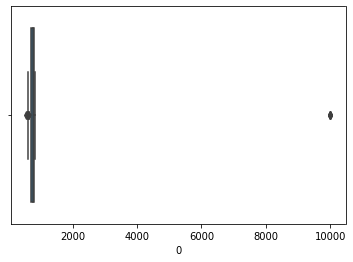

In [ ]:
ax = sns.boxplot(x=df[0])

In [ ]:
df=df[df[0]< 2000]

[Text(0.5, 0, 'Credit scores')]

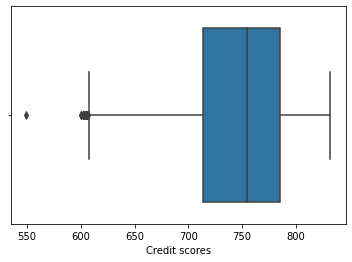

In [ ]:
ax = sns.boxplot(x=df[0])
ax.set(xlabel='Credit scores')

In [ ]:
#ax = sns.boxplot(x=df[17], y=df[0], data=df)
#ax.set(xlabel='House type', ylabel='Credit scores')

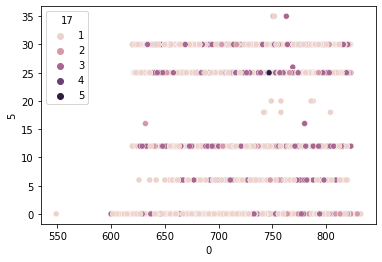

In [ ]:
ax = sns.scatterplot(x=df[0], y=df[5],
...                      hue=df[17], data=df)

In [ ]:
df=df[df[5]< 999]

[Text(0, 0.5, '% of Loan covered by MI'), Text(0.5, 0, 'Credit scores')]

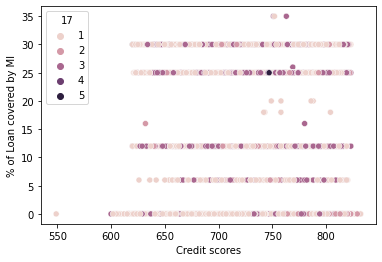

In [ ]:
ax = sns.scatterplot(x=df[0], y=df[5],
...                      hue=df[17], data=df)
ax.set(xlabel='Credit scores', ylabel='% of Loan covered by MI')

In [ ]:
import matplotlib.pyplot as plt

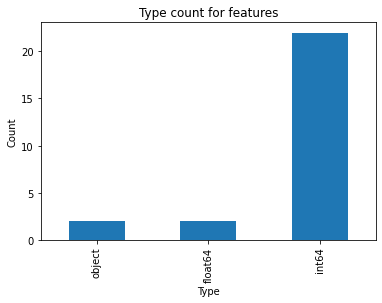

In [ ]:
plt.title('Type count for features')
plt.xlabel('Type')
plt.ylabel('Count')
df.dtypes.value_counts().sort_values().plot(kind='bar')
plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24]


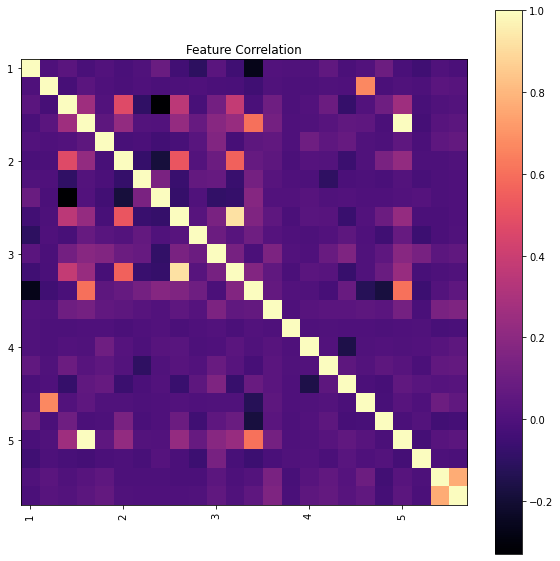

In [ ]:
from matplotlib import cm as cm

def correlation_matrix(df):
    fig = plt.figure(figsize = (10,10))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('magma')
    corr = df.corr()
    cax = ax1.imshow(corr, interpolation="nearest", cmap=cmap)
    plt.title('Feature Correlation')
    labels = df.columns.values
    print(labels)
    ax1.set_xticklabels(corr.columns,fontsize=10, rotation=90)
    ax1.set_yticklabels(corr.columns,fontsize=10)
    fig.colorbar(cax)
    plt.show()

correlation_matrix(df.select_dtypes(include=['float64','int64']))

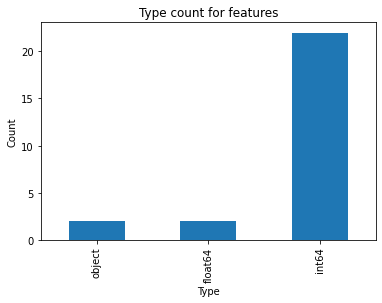

In [ ]:
plt.title('Type count for features')
plt.xlabel('Type')
plt.ylabel('Count')
df.dtypes.value_counts().sort_values().plot(kind='bar')
plt.show()

# Exercises

# 1.0 You would like to build a supervised learning algorithm to predict interest rates (Column 12). What features would you use?

(49993, 24)
[4.37693078e-03 3.80964102e-03 6.64712449e-03 6.82667370e-03
 4.82710866e-03 3.16374221e-03 7.34166204e-04 1.64951079e-03
 3.52707043e-03 4.15158184e-03 6.27545854e-03 3.53484813e-03
 4.80457027e-03 8.41657823e-01 8.08053655e-05 5.20317427e-03
 2.70314671e-03 6.51786982e-03 7.07794171e-03 5.10890520e-03
 5.10770903e-03 2.07366727e-03 7.01405308e-02]


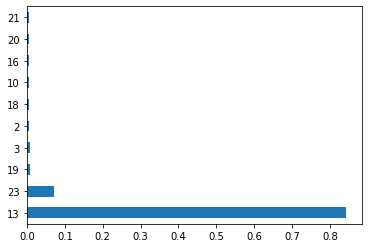

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24
0,794,201703,1,204702,24260.0,0,1,1,74,29,129000,74,3.625,1,1,1,1,68800,1,1,360,2,1,1
1,776,201703,2,203202,-1.0,0,1,1,50,20,85000,50,3.000,1,1,2,1,44600,2,2,180,1,1,1
2,795,201703,1,203202,49180.0,0,1,1,55,26,143000,55,2.750,1,1,3,1,27200,3,1,180,1,1,1
3,785,201705,1,204704,-1.0,30,1,1,95,20,258000,95,4.500,1,1,4,1,74800,4,3,360,2,1,1
4,758,201703,1,203202,24260.0,0,1,1,80,35,117000,80,3.000,1,1,1,1,68800,5,1,180,2,1,1


In [ ]:
df = df.select_dtypes(include=['float64','int64'])

X = df.iloc[:,0:23]  #independent columns
y = df.iloc[:,13]    #target column i.e interest rate

df.head()

print(df.shape)

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

df.head()


Storing interest rate statistics which will be used later for inference. 

In [ ]:
min_rate= df[12].min()
max_rate= df[12].max()
print(min_rate, max_rate, max_rate- min_rate)

2.25 6.125 3.875


In [ ]:
df=(df-df.min())/(df.max()-df.min())

In [ ]:
df = df.iloc[np.random.permutation(len(df))]

In [ ]:
#y = df.iloc[:,df.columns.isin(["int_rate"])]
#x = df.loc[:, ~df.columns.isin(["int_rate"])]

y = df.iloc[:,[12]].copy()
x = df.loc[:, [0,1,2,3,4,5,6,7,8,9,10,11,13,14,16,17,18,19,20,21,22,23,24]].copy()

total_samples=len(df)
split = 0.8

x_train = x[0:int(total_samples*split)]
x_test = x[int(total_samples*split):total_samples]
y_train = y[0:int(total_samples*split)]
y_test = y[int(total_samples*split):total_samples]

#x.head()
#y.head()

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    '''
    Calculates mean absolute error of the true and predicted values.
    '''
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    count = 0
    sum = 0
    for a, p in zip(y_true, y_pred):
        if(a!=0):
            sum+=(abs(a-p)/a)
            count+=1
    return (sum/count) * 100

In [ ]:
def view_metrics(y_test, predictions, algorithm, samples, total_samples):
    '''
    Plots the true and predicted values and prints RMS, MAE and MAPE metrics.
    '''
    fig = plt.figure(figsize=(18,5))
    plt.scatter(x=[i for i in range(samples)], y=[x for x in predictions[0:samples]], label='Predicted values')
    plt.scatter(x=[i for i in range(samples)], y=[x[0] for x in y_test.values[0:samples]], label='True values')
    plt.title('True and Predicted values for test dataset - %s' % algorithm)
    plt.legend()
    plt.show()
    
#     fig = plt.figure(figsize=(18,5))
#     plt.scatter(x=[i for i in range(total_samples)], y=[x for x in predictions], label='Predicted values')
#     plt.scatter(x=[i for i in range(total_samples)], y=[x[0] for x in y_test.values], label='True values')
#     plt.title('True and Predicted values for test dataset - %s' % algorithm)
#     plt.legend()
#     plt.show()

    RMS =  np.sqrt(mean_squared_error(y_test, predictions, multioutput='raw_values'))
    MAE = mean_absolute_error(y_test, predictions, multioutput='raw_values')
    MAPE = mean_absolute_percentage_error(y_test, predictions)
    print("Root Mean Squared Error:", RMS)
    print("Mean Absolute Error", MAE) 
    print("Mean Absolute Percentage Error", MAPE)
    return RMS, MAE, MAPE

# 2.0 Try using Regression, Random Forest and Neural Networks. 
* Which performance metric would you use?
* Do hyper-parameter tuning. Does the model improve?
* Which algorithm works best?

### Linear Regression

In [ ]:
lin_reg_model = LinearRegression() # build model
lin_reg_model= lin_reg_model.fit(x_train, y_train) # train model
R2 = lin_reg_model.score(x_train, y_train) # coefficient of determination
print(lin_reg_model.coef_)

[[-0.16955018  0.01472943 -0.03565793  0.44667398  0.01738    -0.00204733
   0.13139424  0.06659231  0.2653442   0.158481   -0.11026636  0.39691948
   0.00646409  0.05878321  0.00319126  0.00120301  0.02001434 -0.07525904
  -0.0475785  -0.16027942 -0.00784632 -0.00785295  0.01882596]]


In [ ]:
lin_reg_model_predictions = lin_reg_model.predict(x_test) # make predictions

print(lin_reg_model_predictions.shape)
print(y_test.shape)

#type(lin_reg_model_predictions)
type(y_test)

#print(lin_reg_model_predictions)
#print(y_test-lin_reg_model_predictions)


(9999, 1)
(9999, 1)


pandas.core.frame.DataFrame

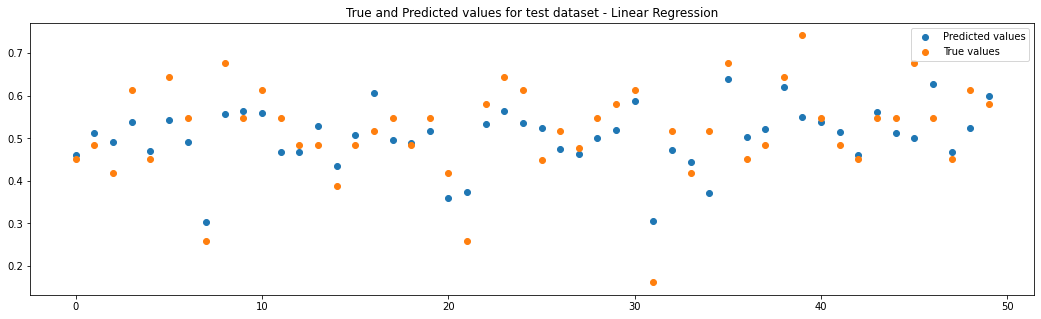

Root Mean Squared Error: [0.07662843]
Mean Absolute Error [0.05917406]
Mean Absolute Percentage Error [13.01890068]


In [ ]:
lin_reg_model_metrics = view_metrics(y_test, lin_reg_model_predictions,'Linear Regression', samples = 50, total_samples=9999)
## If predicted value is same as true value, the points will be overlapping. Closer the points, better is the prediction.

### Random Forest Regressor Model

In [ ]:
rand_forest_model = RandomForestRegressor(max_depth=5, random_state=0) # build model
rand_forest_model = rand_forest_model.fit(x_train, y_train.values.ravel()) # train model
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
feature_importance = rand_forest_model.feature_importances_
R2 = rand_forest_model.score(x_train, y_train) # coefficient of determination
rand_forest_model_predictions = rand_forest_model.predict(x_test) # make predictions

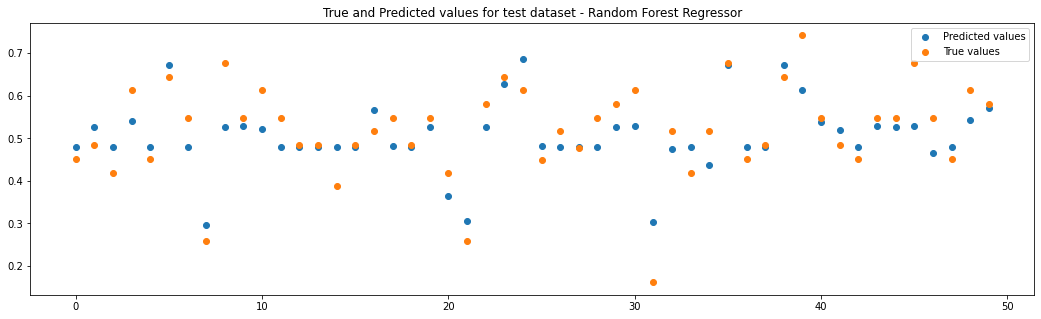

Root Mean Squared Error: [0.07043491]
Mean Absolute Error [0.0541295]
Mean Absolute Percentage Error [11.96285143]


In [ ]:
rand_forest_model_metrics = view_metrics(y_test, rand_forest_model_predictions,'Random Forest Regressor', samples = 50, total_samples=2000)

### Neural Network Regression Model

In [ ]:
nn_model = MLPRegressor(hidden_layer_sizes=(10,4),
                                    activation='relu', # activation function in the nodes of the neral net
                                    solver='adam', # optimizer algorithm
                                    learning_rate='constant',
                                    learning_rate_init=0.001, # initial learning rate
                                    max_iter=300, # max iterations to train for
                                    tol = -1, # tolerance for when to stop training should be range 0.001 to 0.0000001, -1 for max_iter
                                    shuffle=True,
                                    verbose=True) # show details at each iteration
nn_model = nn_model.fit(x_train, y_train.values.ravel())

Iteration 1, loss = 0.10254614
Iteration 2, loss = 0.01858334
Iteration 3, loss = 0.01086897
Iteration 4, loss = 0.00769501
Iteration 5, loss = 0.00621770
Iteration 6, loss = 0.00528008
Iteration 7, loss = 0.00457093
Iteration 8, loss = 0.00401589
Iteration 9, loss = 0.00358653
Iteration 10, loss = 0.00326493
Iteration 11, loss = 0.00304227
Iteration 12, loss = 0.00290497
Iteration 13, loss = 0.00281029
Iteration 14, loss = 0.00274702
Iteration 15, loss = 0.00270137
Iteration 16, loss = 0.00267068
Iteration 17, loss = 0.00264385
Iteration 18, loss = 0.00262271
Iteration 19, loss = 0.00260538
Iteration 20, loss = 0.00258792
Iteration 21, loss = 0.00258679
Iteration 22, loss = 0.00256293
Iteration 23, loss = 0.00256116
Iteration 24, loss = 0.00255326
Iteration 25, loss = 0.00254366
Iteration 26, loss = 0.00253570
Iteration 27, loss = 0.00253878
Iteration 28, loss = 0.00252800
Iteration 29, loss = 0.00252017
Iteration 30, loss = 0.00251563
Iteration 31, loss = 0.00250955
Iteration 32, los

In [ ]:
nn_model_predictions = nn_model.predict(x_test)

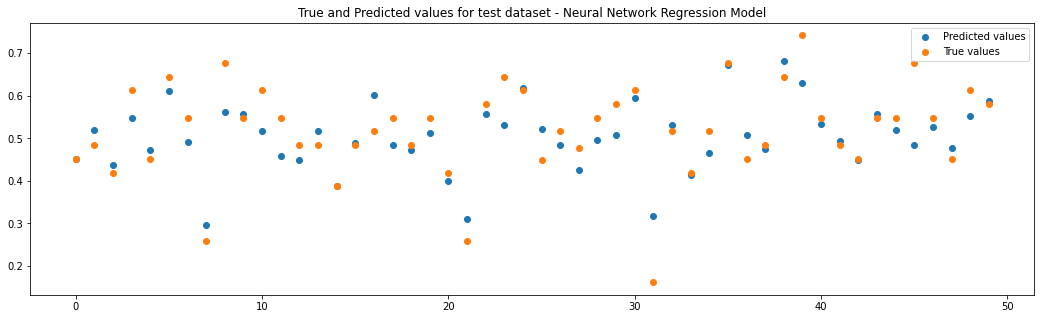

Root Mean Squared Error: [0.06872917]
Mean Absolute Error [0.05241228]
Mean Absolute Percentage Error [11.45221891]


In [ ]:
nn_model_metrics = view_metrics(y_test, nn_model_predictions,'Neural Network Regression Model', samples = 50, total_samples=2000)

## Comparing model performances

In [ ]:
print("%10s | %7s | %7s | %7s" % ('MODEL', 'RMSE', 'MAE', 'MAPE'))
print('___________________________________________')
for name,metrics in zip(['LIN_REG','RAND_FRST','NN'],[lin_reg_model_metrics, rand_forest_model_metrics, nn_model_metrics]):
    print ("%10s | %.5f | %.5f | %.5f %%" % (name, metrics[0][0], metrics[1][0], metrics[2][0]))
print()
print('Note: Lower values are better')

     MODEL |    RMSE |     MAE |    MAPE
___________________________________________
   LIN_REG | 0.07663 | 0.05917 | 13.01890 %
 RAND_FRST | 0.07043 | 0.05413 | 11.96285 %
        NN | 0.06873 | 0.05241 | 11.45222 %

Note: Lower values are better


## Predicting interest rates


In [ ]:
def get_interest_rate(model, features):
    return (model.predict(features))*(max_rate-min_rate) + min_rate

In [ ]:
sample = x_test[2:3] # substitute with the input you want to predict the rate for
interest_rate = get_interest_rate(rand_forest_model, sample)
print('Predicted interest rate is:', interest_rate)
print('for the following user profile:')
sample

Predicted interest rate is: [4.10737877]
for the following user profile:


,0,1,2,3,4,5,6,7,8,9,10,11,13,14,16,17,18,19,20,21,22,23,24
47408,0.879859,0.925926,0.5,0.996529,0.358276,0.0,0.0,0.0,0.040282,0.048096,0.115789,0.040282,1.0,0.0,0.09434,0.0,0.808661,0.948179,0.5,1.0,0.0,0.576923,0.741935


# 3.0 Try TPOT, AutoSKLearn and H20's Automl to see if you can improve performance. Does the model improve?